In [1]:
import numpy as np
from pyGPGO.covfunc import matern32
from pyGPGO.covfunc import matern52
from pyGPGO.covfunc import gammaExponential
from pyGPGO.covfunc import expSine
from pyGPGO.acquisition import Acquisition
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.GPGO import GPGO
from pyGPGO.surrogates.RandomForest import RandomForest
from pyGPGO.surrogates.BoostedTrees import BoostedTrees
from pyGPGO.surrogates.Ensemble import Ensemble
from pyGPGO.covfunc import squaredExponential
from pyGPGO.covfunc import rationalQuadratic

%matplotlib inline

/home/ljagged/anaconda2/envs/thinkful/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ljagged/anaconda2/envs/thinkful/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ljagged/anaconda2/envs/thinkful/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Franke Test Function #

In [2]:
def franke(x, y):
    # Franke's function (https://www.mathworks.com/help/curvefit/franke.html)
    p1 = 0.75 * np.exp(-(9 * x - 2) ** 2 / 4 - (9 * y - 2) ** 2 / 4)
    p2 = 0.75 * np.exp(-(9 * x + 1) ** 2/ 49 - (9 * y + 1) / 10)
    p3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4 - (9 * y -3) ** 2 / 4)
    p4 = 0.25 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return p1 + p2 + p3 - p4

In [25]:
np.random.seed(42)
mat32 = matern32()
mat52 = matern52()
gamex = gammaExponential()
sqex = squaredExponential()
rquad = rationalQuadratic()
gpmat32 = GaussianProcess(mat32,optimize=False, usegrads=False)
gpmat52 = GaussianProcess(mat52,optimize=False, usegrads=False)
gpsqex = GaussianProcess(sqex,optimize=False)
gprquad = GaussianProcess(rquad,optimize=False)
gpgamex = GaussianProcess(gamex,optimize=False)
acqEI = Acquisition(mode='ExpectedImprovement')
param = {'x': ('cont', [0, 1]),
         'y': ('cont', [0, 1])}

# Visualize Franke functions #

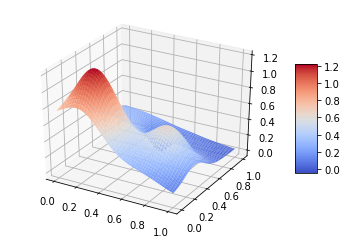

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.linspace(0, 1, num=1000)
y = np.linspace(0, 1, num=1000)
X, Y = np.meshgrid(x, y)
Z = franke(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Matern 32 #

In [5]:
gpgomat32 = GPGO(gpmat32, acqEI, franke, param)
gpgomat32.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.37454012  0.95071431]. 	  0.18039271504077337 	 1.1521992876780236
init   	 [ 0.73199394  0.59865848]. 	  0.23766221215673286 	 1.1521992876780236
init   	 [ 0.15601864  0.15599452]. 	  1.1521992876780236 	 1.1521992876780236
1      	 [ 0.  0.]. 	  0.766420591285 	 1.15219928768
2      	 [ 0.45241365  0.        ]. 	  0.502000060636 	 1.15219928768
3      	 [ 0.03619381  0.37196087]. 	  0.704796908996 	 1.15219928768
4      	 [ 0.22520494  0.20663416]. 	  1.21430266571 	 1.21430266571
5      	 [ 0.28148469  0.27823956]. 	  1.06818781342 	 1.21430266571
6      	 [ 0.23229934  0.17027339]. 	  1.18844627075 	 1.21430266571
7      	 [ 0.20239112  0.20720125]. 	  1.21982667583 	 1.21982667583
8      	 [ 1.  1.]. 	  0.0358695923861 	 1.21982667583
9      	 [ 1.  0.]. 	  0.107557552258 	 1.21982667583
10     	 [ 0.20757486  0.19889235]. 	  1.21875380529 	 1.21982667583
11     	 [ 0.20879858  0.21119704]. 	  1.21977226272 	 

# Squared Exponential #

In [6]:
gpgosqex = GPGO(gpsqex, acqEI, franke, param)
gpgosqex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.9612079   0.11654669]. 	  0.18899943807558328 	 0.594524035177655
init   	 [ 0.70956772  0.23034416]. 	  0.5543595599403837 	 0.594524035177655
init   	 [ 0.41447673  0.03286273]. 	  0.594524035177655 	 0.594524035177655
1      	 [ 0.14734871  0.89519381]. 	  0.271508273272 	 0.594524035178
2      	 [ 0.44046074  0.39567659]. 	  0.489049186409 	 0.594524035178
3      	 [ 0.7503597  1.       ]. 	  0.0809640959399 	 0.594524035178
4      	 [ 0.56891277  0.        ]. 	  0.361948518867 	 0.594524035178
5      	 [ 0.  0.]. 	  0.766420591285 	 0.766420591285
6      	 [ 1.          0.53451045]. 	  0.135548632759 	 0.766420591285
7      	 [  3.86902856e-02  -1.38777878e-17]. 	  0.793403268199 	 0.793403268199
8      	 [ 0.13325651  0.01755272]. 	  0.878779785044 	 0.878779785044
9      	 [ 0.          0.26818806]. 	  0.786683881548 	 0.878779785044
10     	 [ 0.11064495  0.1245254 ]. 	  1.03977331432 	 1.03977331432
11     

# Rational Quadratic #

In [7]:
gpgorquad = GPGO(gprquad, acqEI, franke, param)
gpgorquad.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.78747693  0.92423783]. 	  0.07816926165449505 	 0.7047161442319383
init   	 [ 0.16313511  0.42787448]. 	  0.7047161442319383 	 0.7047161442319383
init   	 [ 0.4332104   0.35447225]. 	  0.5606893940499557 	 0.7047161442319383
1      	 [ 0.  0.]. 	  0.766420591285 	 0.766420591285
2      	 [ 0.  1.]. 	  0.270337161488 	 0.766420591285
3      	 [ 0.          0.23278233]. 	  0.814529285657 	 0.814529285657
4      	 [ 1.  0.]. 	  0.107557552258 	 0.814529285657
5      	 [ 0.10907347  0.14933033]. 	  1.06731011523 	 1.06731011523
6      	 [ 0.29595461  0.        ]. 	  0.763651981411 	 1.06731011523
7      	 [ 0.16308655  0.15559108]. 	  1.15977747757 	 1.15977747757
8      	 [ 1.  1.]. 	  0.0358695923861 	 1.15977747757
9      	 [ 0.23294806  0.18974001]. 	  1.20366358249 	 1.20366358249
10     	 [ 0.18462854  0.97528977]. 	  0.244100544375 	 1.20366358249
11     	 [ 0.23307229  0.24102926]. 	  1.19304277448 	 1.203663582

# Matern 52 #

In [11]:
gpgomat52 = GPGO(gpmat52, acqEI, franke, param)
gpgomat52.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.37454012  0.95071431]. 	  0.18039271504077337 	 1.1521992876780236
init   	 [ 0.73199394  0.59865848]. 	  0.23766221215673286 	 1.1521992876780236
init   	 [ 0.15601864  0.15599452]. 	  1.1521992876780236 	 1.1521992876780236
1      	 [ -1.11022302e-16   0.00000000e+00]. 	  0.766420591285 	 1.15219928768
2      	 [ 0.47195339  0.        ]. 	  0.472836988895 	 1.15219928768
3      	 [ 0.05067721  0.38676319]. 	  0.697727501295 	 1.15219928768
4      	 [ 0.22232091  0.19276355]. 	  1.21234074626 	 1.21234074626
5      	 [ 0.25385942  0.22754237]. 	  1.17974175985 	 1.21234074626
6      	 [ 0.23613325  0.15603556]. 	  1.1674907622 	 1.21234074626
7      	 [ 0.20334645  0.21210476]. 	  1.21967481427 	 1.21967481427
8      	 [ 1.  1.]. 	  0.0358695923861 	 1.21967481427
9      	 [ 0.98371241  0.23917119]. 	  0.252472979216 	 1.21967481427
10     	 [ 0.04195122  0.96848878]. 	  0.273068634005 	 1.21967481427
11     	 [ 0.

# Gamma Exponential #

In [12]:
gpgogamex = GPGO(gpgamex, acqEI, franke, param)
gpgogamex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.9612079   0.11654669]. 	  0.18899943807558328 	 0.594524035177655
init   	 [ 0.70956772  0.23034416]. 	  0.5543595599403837 	 0.594524035177655
init   	 [ 0.41447673  0.03286273]. 	  0.594524035177655 	 0.594524035177655
1      	 [ 0.0205797   0.54766627]. 	  0.441378179687 	 0.594524035178
2      	 [ 0.  0.]. 	  0.766420591285 	 0.766420591285
3      	 [ 0.13296761  0.16383733]. 	  1.12642435147 	 1.12642435147
4      	 [ 0.19651445  0.23637069]. 	  1.20661896706 	 1.20661896706
5      	 [ 0.1321457   0.25474296]. 	  1.11227979098 	 1.20661896706
6      	 [ 0.26956057  0.28514851]. 	  1.07723733634 	 1.20661896706
7      	 [ 0.21552654  0.18421413]. 	  1.21022993845 	 1.21022993845
8      	 [ 0.23472601  0.21791235]. 	  1.20603362037 	 1.21022993845
9      	 [ 0.18250645  0.20139097]. 	  1.21126978096 	 1.21126978096
10     	 [ 0.20457135  0.13462336]. 	  1.14819317862 	 1.21126978096
11     	 [ 0.26489833  0.18288

# Ensemble #

In [13]:
ens = Ensemble([gprquad,gpsqex,gpmat32,gpgamex,gpmat52])
gpgo = GPGO(ens, acqEI, franke, param)
gpgo.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.78747693  0.92423783]. 	  0.07816926165449505 	 0.7047161442319383
init   	 [ 0.16313511  0.42787448]. 	  0.7047161442319383 	 0.7047161442319383
init   	 [ 0.4332104   0.35447225]. 	  0.5606893940499557 	 0.7047161442319383
1      	 [ 0.  0.]. 	  0.766420591285 	 0.766420591285
2      	 [ 0.          0.24586777]. 	  0.805732177285 	 0.805732177285
3      	 [ 0.  1.]. 	  0.270337161488 	 0.805732177285
4      	 [ 0.14300246  0.13889441]. 	  1.11217522174 	 1.11217522174
5      	 [ 0.31431056  0.        ]. 	  0.736208286077 	 1.11217522174
6      	 [ 0.19349548  0.17554357]. 	  1.20309219547 	 1.20309219547
7      	 [ 0.23902755  0.20256602]. 	  1.20268886725 	 1.20309219547
8      	 [ 0.20045092  0.21774067]. 	  1.21813622926 	 1.21813622926
9      	 [ 0.21353493  0.19504281]. 	  1.21660847232 	 1.21813622926
10     	 [ 0.22674203  0.24043502]. 	  1.1981609001 	 1.21813622926
11     	 [ 0.17079538  0.20973252]. 	  1

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

frankeCumMax = pd.read_csv('./FrankeCumMax.csv')

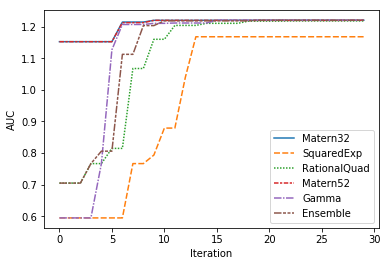

In [19]:
ax = sns.lineplot(data=frankeCumMax[:30])

ax.set(xlabel='Iteration', ylabel='AUC')
plt.show()

# Bukin no. 6 Test Function #

In [21]:
def bukin(x,y):
    return -1*(100*np.sqrt(np.abs(y-0.01*x**2))+.01*np.abs(x+10))

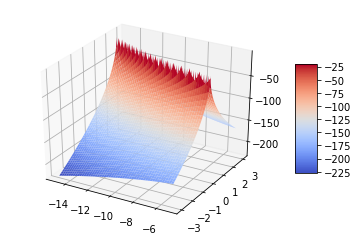

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.linspace(-15, -5, num=1000)
y = np.linspace(-3, 3, num=1000)
X, Y = np.meshgrid(x, y)
Z = bukin(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# function max of 0.0 at (-10,1) #

# Matern 32 #

In [28]:
param = {'x': ('cont', [-15, -5]),
         'y': ('cont', [-3, 3])}
gpgomat32 = GPGO(gpmat32, acqEI, bukin, param)
gpgomat32.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-7.12523072  2.54542699]. 	  -142.77810378383268 	 -141.82369290314148
init   	 [-13.36864885  -0.4327531 ]. 	  -149.0290159316642 	 -141.82369290314148
init   	 [-10.66789598  -0.8731665 ]. 	  -141.82369290314148 	 -141.82369290314148
1      	 [-5. -3.]. 	  -180.32756377319947 	 -141.82369290314148
2      	 [-15.   3.]. 	  -86.65254037844386 	 -86.65254037844386
3      	 [-11.0840927   3.       ]. 	  -133.10587807114192 	 -86.65254037844386
4      	 [-15.  -3.]. 	  -229.178784747792 	 -86.65254037844386
5      	 [-8.47371432 -3.        ]. 	  -192.83741781981354 	 -86.65254037844386
6      	 [-5.          0.45096393]. 	  -44.87900090334241 	 -44.87900090334241
7      	 [-5.  3.]. 	  -165.88123951777 	 -44.87900090334241
8      	 [-7.28447665 -0.19486281]. 	  -85.2033730607687 	 -44.87900090334241
9      	 [-11.82927961  -3.        ]. 	  -209.76381863958082 	 -44.87900090334241
10     	 [-15.           0.99067155]. 	  -

99     	 [-11.30609785  -0.60970003]. 	  -137.41679147920573 	 -10.747464747496268
100    	 [-14.38230661   1.51636482]. 	  -74.3501228256743 	 -10.747464747496268


# Squared Exponential #

In [29]:
gpgosqex = GPGO(gpsqex, acqEI, bukin, param)
gpgosqex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-10.28589661  -1.42690986]. 	  -157.6387225289011 	 -148.83610013864245
init   	 [-14.15381615  -0.21067705]. 	  -148.83610013864245 	 -148.83610013864245
init   	 [-13.28631309  -1.45065431]. 	  -179.36260031149223 	 -148.83610013864245
1      	 [-5.  3.]. 	  -165.88123951777 	 -148.83610013864245
2      	 [-5. -3.]. 	  -180.32756377319947 	 -148.83610013864245
3      	 [-10.01912875   3.        ]. 	  -141.2860925928617 	 -141.2860925928617
4      	 [-15.   3.]. 	  -86.65254037844386 	 -86.65254037844386
5      	 [-7.07213684  0.10978543]. 	  -62.50853655256268 	 -62.50853655256268
6      	 [-7.95791355 -3.        ]. 	  -190.6321697175164 	 -62.50853655256268
7      	 [-12.5001189    1.98696539]. 	  -65.1737281853573 	 -62.50853655256268
8      	 [-5.         -0.01223735]. 	  -51.25911573651887 	 -51.25911573651887
9      	 [-15.  -3.]. 	  -229.178784747792 	 -51.25911573651887
10     	 [-7.55542126  3.        ]. 	  -

100    	 [-9.3870088  -0.05589664]. 	  -96.80778169177164 	 -9.616850277620788


# Rational Quadratic #

In [64]:
gpgorquad = GPGO(gprquad, acqEI, bukin, param)
gpgorquad.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.96335913 1.86169665]. 	  -136.21312506466685 	 -89.17535217562447
init   	 [-0.76719969  0.79946447]. 	  -89.17535217562447 	 -89.17535217562447
init   	 [ 2.50989061 -1.33296426]. 	  -118.27584019402397 	 -89.17535217562447
1      	 [-3. -2.]. 	  -144.6383229480096 	 -89.17535217562447
2      	 [-3.  2.]. 	  -138.27274961085251 	 -89.17535217562447
3      	 [3. 2.]. 	  -138.33274961085252 	 -89.17535217562447
4      	 [ 0.03339114 -2.        ]. 	  -141.5220843490725 	 -89.17535217562447
5      	 [-0.9825054   0.74039279]. 	  -85.57348471737727 	 -85.57348471737727
6      	 [-1.31819936  0.55636205]. 	  -73.50245378231708 	 -73.50245378231708
7      	 [-1.68993091  0.22223628]. 	  -44.09191961421508 	 -44.09191961421508
8      	 [-1.97090442 -0.03411405]. 	  -27.091157939668058 	 -27.091157939668058
9      	 [-2.1859861  -0.36403611]. 	  -64.25145699041306 	 -27.091157939668058
10     	 [-2.1940686  0.1955134]. 	  -3

# Matern 52 #

In [30]:
gpgomat52 = GPGO(gpmat52, acqEI, bukin, param)
gpgomat52.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-14.45983954   0.97832565]. 	  -105.52179730337414 	 -86.37949020458889
init   	 [-8.166976   -1.63535785]. 	  -151.75338948098334 	 -86.37949020458889
init   	 [-10.8928041    0.44054441]. 	  -86.37949020458889 	 -86.37949020458889
1      	 [-5.  3.]. 	  -165.88123951777 	 -86.37949020458889
2      	 [-15.  -3.]. 	  -229.178784747792 	 -86.37949020458889
3      	 [-5. -3.]. 	  -180.32756377319947 	 -86.37949020458889
4      	 [-8.93179734  3.        ]. 	  -148.40980476667013 	 -86.37949020458889
5      	 [-11.30270568  -3.        ]. 	  -206.83448523902192 	 -86.37949020458889
6      	 [-12.50175705   3.        ]. 	  -119.90248443882834 	 -86.37949020458889
7      	 [-5.          0.06487334]. 	  -43.07634799706136 	 -43.07634799706136
8      	 [-15.   3.]. 	  -86.65254037844386 	 -43.07634799706136
9      	 [-7.04138762  0.8489929 ]. 	  -59.45866194503679 	 -43.07634799706136
10     	 [-12.97839834  -0.68211101]. 	  -1

99     	 [-11.85649251  -1.96323039]. 	  -183.5667749446506 	 -18.043017455087394
100    	 [-13.21831598   0.48859746]. 	  -112.22136775142678 	 -18.043017455087394


# Gamma Exponential #

In [31]:
gpgogamex = GPGO(gpgamex, acqEI, bukin, param)
gpgogamex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-8.23523424  0.25915672]. 	  -64.75049139545337 	 -64.75049139545337
init   	 [-6.83063318  1.51840895]. 	  -102.59062577973587 	 -64.75049139545337
init   	 [-5.25330147 -2.45680616]. 	  -165.35862571940115 	 -64.75049139545337
1      	 [-15.  -3.]. 	  -229.178784747792 	 -64.75049139545337
2      	 [-15.   3.]. 	  -86.65254037844386 	 -64.75049139545337
3      	 [-11.03767002   3.        ]. 	  -133.4906526245904 	 -64.75049139545337
4      	 [-10.16280541  -3.        ]. 	  -200.82060468833762 	 -64.75049139545337
5      	 [-5.  3.]. 	  -165.88123951777 	 -64.75049139545337
6      	 [-13.32419257   0.37214018]. 	  -118.4900231439306 	 -64.75049139545337
7      	 [-8.54160893  3.        ]. 	  -150.69335377565545 	 -64.75049139545337
8      	 [-5.          0.06122915]. 	  -43.497767343344364 	 -43.497767343344364
9      	 [-1.05349569e+01 -7.71023286e-03]. 	  -105.72022113307418 	 -43.497767343344364
10     	 [-7.539732

98     	 [-5.74687088  1.81195635]. 	  -121.76726601870908 	 -12.107749421380472
99     	 [-9.32665202 -0.61060777]. 	  -121.68138761177474 	 -12.107749421380472
100    	 [-9.24310629  0.79140201]. 	  -25.09703436231946 	 -12.107749421380472


# Ensemble #

In [32]:
ens = Ensemble([gprquad,gpsqex,gpmat32,gpgamex,gpmat52])
gpgo = GPGO(ens, acqEI, bukin, param)
gpgo.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-5.60133775 -1.8601187 ]. 	  -147.48443372139153 	 -52.27010422156355
init   	 [-13.14004122   1.45371862]. 	  -52.27010422156355 	 -52.27010422156355
init   	 [-9.80993777 -2.03981772]. 	  -173.26951191301592 	 -52.27010422156355
1      	 [-15.  -3.]. 	  -229.178784747792 	 -52.27010422156355
2      	 [-5.  3.]. 	  -165.88123951777 	 -52.27010422156355
3      	 [-15.   3.]. 	  -86.65254037844386 	 -52.27010422156355
4      	 [-10.0071852   3.       ]. 	  -141.3705936766351 	 -52.27010422156355
5      	 [-15.           0.27771081]. 	  -140.4882138040814 	 -52.27010422156355
6      	 [-7.62384375  0.85111729]. 	  -51.974445402363145 	 -51.974445402363145
7      	 [-11.610803     0.36771861]. 	  -99.03069572553453 	 -51.974445402363145
8      	 [-12.70960598   3.        ]. 	  -117.6986371290179 	 -51.974445402363145
9      	 [-5.          0.46423647]. 	  -46.33568517604202 	 -46.33568517604202
10     	 [-7.57063727  3.  

99     	 [-14.48245463  -2.56025437]. 	  -215.86116526610715 	 -8.018808785186346
100    	 [-8.4973485   1.52828176]. 	  -89.80547369348433 	 -8.018808785186346


# Rastrigin Test Function #

In [34]:
def rastrigin(x,y):
    return -1*(20+(x**2 - 10*np.cos(2*np.pi*x))+(y**2 - 10*np.cos(2*np.pi*y)))

# Visualize Rastrigin functions #

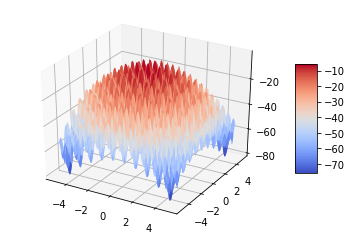

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.linspace(-5.12, 5.12, num=1000)
y = np.linspace(-5.12, 5.12, num=1000)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Matern 32 #

In [38]:
param = {'x': ('cont', [-5.12, 5.12]),
         'y': ('cont', [-5.12, 5.12])}
gpgomat32 = GPGO(gpmat32, acqEI, rastrigin, param)
gpgomat32.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [4.40850655 0.31653053]. 	  -51.98730083477311 	 -21.891311980474498
init   	 [-2.01065041 -3.21013396]. 	  -21.891311980474498 	 -21.891311980474498
init   	 [-0.93613489  4.37760118]. 	  -38.01979411761581 	 -21.891311980474498
1      	 [ 5.12 -5.12]. 	  -57.849427451571785 	 -21.891311980474498
2      	 [-5.12        0.95718803]. 	  -30.200539349407975 	 -21.891311980474498
3      	 [5.12 5.12]. 	  -57.849427451571785 	 -21.891311980474498
4      	 [-5.12 -5.12]. 	  -57.849427451571785 	 -21.891311980474498
5      	 [-5.12  5.12]. 	  -57.849427451571785 	 -21.891311980474498
6      	 [-0.10641074  0.099558  ]. 	  -4.067859555936913 	 -4.067859555936913
7      	 [ 0.88200109 -5.12      ]. 	  -32.32746207431185 	 -4.067859555936913
8      	 [ 1.13698642 -1.51969766]. 	  -27.006745021792135 	 -4.067859555936913
9      	 [-1.50590833  0.68081634]. 	  -36.935707364609186 	 -4.067859555936913
10     	 [1.8293269  2.6856218

100    	 [-1.5848369   3.43603733]. 	  -52.13392902938853 	 -0.15976635741013467


# Squared Exponential #

In [40]:
gpgosqex = GPGO(gpsqex, acqEI, rastrigin, param)
gpgosqex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.3829881  -4.54660824]. 	  -57.809498058249545 	 -43.10041392672637
init   	 [3.44845891 1.25253854]. 	  -43.10041392672637 	 -43.10041392672637
init   	 [-4.44263376  4.21765055]. 	  -64.86436925618801 	 -43.10041392672637
1      	 [-5.12      -1.5096442]. 	  -51.18538539767147 	 -43.10041392672637
2      	 [ 5.12 -5.12]. 	  -57.849427451571785 	 -43.10041392672637
3      	 [0.51753153 5.12      ]. 	  -49.1319445602127 	 -43.10041392672637
4      	 [-1.04077982  0.53931919]. 	  -21.396938577143615 	 -21.396938577143615
5      	 [5.12 5.12]. 	  -57.849427451571785 	 -21.396938577143615
6      	 [-4.5299524 -5.12     ]. 	  -69.26861496770955 	 -21.396938577143615
7      	 [ 2.58720979 -2.25237674]. 	  -40.452099987352916 	 -21.396938577143615
8      	 [-3.7923151   1.20629787]. 	  -30.497775735630995 	 -21.396938577143615
9      	 [ 5.12       -1.26701454]. 	  -41.59705917374486 	 -21.396938577143615
10     	 [-2.0736

# Rational Quadratic #

In [65]:
gpgorquad = GPGO(gprquad, acqEI, rastrigin, param)
gpgorquad.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [1.48718322 1.70811671]. 	  -37.698303777961684 	 -35.69392246835916
init   	 [ 0.66669638 -0.50149335]. 	  -35.69392246835916 	 -35.69392246835916
init   	 [1.53510446 0.46361994]. 	  -42.06910834086226 	 -35.69392246835916
1      	 [-3. -2.]. 	  -13.0 	 -13.0 
2      	 [-3.  2.]. 	  -13.0 	 -13.0 
3      	 [ 3. -2.]. 	  -13.0 	 -13.0 
4      	 [-3.         -0.00608719]. 	  -9.007350311561996 	 -9.007350311561996
5      	 [-3.          0.23252718]. 	  -17.958423126364025 	 -9.007350311561996
6      	 [-3.         -0.62539112]. 	  -26.444783441550193 	 -9.007350311561996
7      	 [-3.         -0.11388688]. 	  -11.465791746274277 	 -9.007350311561996
8      	 [-3.         -1.41307421]. 	  -29.541975795871192 	 -9.007350311561996
9      	 [-0.62959931 -1.86688045]. 	  -24.044157802753457 	 -9.007350311561996
10     	 [ 1.67083477 -1.84917981]. 	  -25.146580625951565 	 -9.007350311561996
11     	 [-0.55779692  1.9505975 ].

# Matern 52 #

In [41]:
gpgomat52 = GPGO(gpmat52, acqEI, rastrigin, param)
gpgomat52.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-4.67269023 -0.31129094]. 	  -50.35620723099362 	 -25.497900596061776
init   	 [-0.96346393  3.30495273]. 	  -25.497900596061776 	 -25.497900596061776
init   	 [-4.63296022 -4.53433088]. 	  -78.50143877543236 	 -25.497900596061776
1      	 [ 5.12 -5.12]. 	  -57.849427451571785 	 -25.497900596061776
2      	 [5.12 5.12]. 	  -57.849427451571785 	 -25.497900596061776
3      	 [ 1.23465808 -1.33153768]. 	  -27.236879115715286 	 -25.497900596061776
4      	 [-5.12  5.12]. 	  -57.849427451571785 	 -25.497900596061776
5      	 [5.12       0.24718005]. 	  -38.808638510683146 	 -25.497900596061776
6      	 [ 0.14263538 -5.12      ]. 	  -32.699272699053985 	 -25.497900596061776
7      	 [1.46341703 5.12      ]. 	  -50.80329163885432 	 -25.497900596061776
8      	 [-1.32714339  0.16736006]. 	  -21.48658065155761 	 -21.48658065155761
9      	 [2.1682807  1.73263024]. 	  -23.880739048418107 	 -21.48658065155761
10     	 [-1.6624158

# Gamma Exponential #

In [42]:
gpgogamex = GPGO(gpgamex, acqEI, rastrigin, param)
gpgogamex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.1922403  -4.13105769]. 	  -26.75571099497499 	 -26.75571099497499
init   	 [-2.74445132 -3.69104117]. 	  -45.12470373300384 	 -26.75571099497499
init   	 [ 3.35983871 -1.30471529]. 	  -42.727768703760105 	 -26.75571099497499
1      	 [-5.12  5.12]. 	  -57.849427451571785 	 -26.75571099497499
2      	 [5.12 5.12]. 	  -57.849427451571785 	 -26.75571099497499
3      	 [-0.26445858  2.9023511 ]. 	  -21.22467662851602 	 -21.22467662851602
4      	 [ 5.12 -5.12]. 	  -57.849427451571785 	 -21.22467662851602
5      	 [-5.12        0.13018965]. 	  -32.10488321705042 	 -21.22467662851602
6      	 [0.97082467 5.12      ]. 	  -30.034764387171485 	 -21.22467662851602
7      	 [-5.12 -5.12]. 	  -57.849427451571785 	 -21.22467662851602
8      	 [-0.86210975 -0.0118201 ]. 	  -4.295123173370053 	 -4.295123173370053
9      	 [5.12       1.39733811]. 	  -48.868002490343144 	 -4.295123173370053
10     	 [-1.7393483   0.44782252]. 	  -3

# Ensemble #

In [43]:
ens = Ensemble([gprquad,gpsqex,gpmat32,gpgamex,gpmat52])
gpgo = GPGO(ens, acqEI, rastrigin, param)
gpgo.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-3.30983593  1.5198675 ]. 	  -46.85885644795001 	 -36.370504189227034
init   	 [ 0.35093998 -2.52628636]. 	  -42.29472967134677 	 -36.370504189227034
init   	 [-3.01948709  5.08329275]. 	  -36.370504189227034 	 -36.370504189227034
1      	 [5.12 5.12]. 	  -57.849427451571785 	 -36.370504189227034
2      	 [ 5.12 -5.12]. 	  -57.849427451571785 	 -36.370504189227034
3      	 [-5.12 -5.12]. 	  -57.849427451571785 	 -36.370504189227034
4      	 [5.12       0.13977768]. 	  -32.559254910084505 	 -32.559254910084505
5      	 [0.84635597 5.12      ]. 	  -33.949937646268246 	 -32.559254910084505
6      	 [-5.12       -1.35651566]. 	  -46.96888755870651 	 -32.559254910084505
7      	 [1.43544766 1.36081279]. 	  -39.514508011494456 	 -32.559254910084505
8      	 [-1.24004089 -5.12      ]. 	  -39.83707419155925 	 -32.559254910084505
9      	 [-5.12  5.12]. 	  -57.849427451571785 	 -32.559254910084505
10     	 [ 1.95180558 -5.12   

100    	 [0.12038012 2.80514048]. 	  -17.214305605042096 	 -1.8494795653002978


# Griewank Test Function #

In [45]:
def griewank(x,y):
    return -1*(x**2/4000 + y**2 /4000 - (np.cos(x) * np.cos(y/np.sqrt(2))) + 1)

# Visualize Griewank Function #

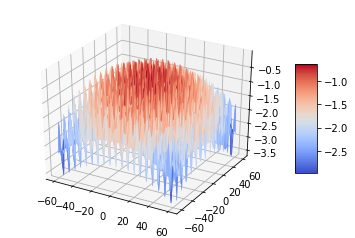

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.linspace(-60, 60, num=1000)
y = np.linspace(-60, 60, num=1000)
X, Y = np.meshgrid(x, y)
Z = griewank(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Matern32 #

In [48]:
param = {'x': ('cont', [-600, 600]),
         'y': ('cont', [-600, 600])}
gpgomat32 = GPGO(gpmat32, acqEI, griewank, param)
gpgomat32.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-502.68697403   72.40092124]. 	  -64.88625636211854 	 -64.88625636211854
init   	 [-279.54896252  500.31503395]. 	  -82.77610345544102 	 -64.88625636211854
init   	 [ 538.39510423 -127.57716445]. 	  -77.29977732864162 	 -64.88625636211854
1      	 [ 118.73859816 -349.1734881 ]. 	  -35.23267870310272 	 -35.23267870310272
2      	 [408.83294395 309.09101949]. 	  -66.47197036370937 	 -35.23267870310272
3      	 [-574.2560558   334.74220546]. 	  -111.08124428426137 	 -35.23267870310272
4      	 [ 308.59295135 -356.67330633]. 	  -56.13028408459754 	 -35.23267870310272
5      	 [-556.2386704   176.93608165]. 	  -87.0156817433439 	 -35.23267870310272
6      	 [-184.44322167  561.01467868]. 	  -88.59081312910271 	 -35.23267870310272
7      	 [-450.73400256 -266.56482066]. 	  -69.6389273218892 	 -35.23267870310272
8      	 [-151.48924554   46.41716392]. 	  -7.149628153254889 	 -7.149628153254889
9      	 [-406.13675761  420.989

96     	 [-455.83727252  512.14223794]. 	  -117.89444247469422 	 -2.1736918971592507
97     	 [480.31845647 376.88863846]. 	  -93.37813709971194 	 -2.1736918971592507
98     	 [-414.24449129  291.74519916]. 	  -64.72956871814455 	 -2.1736918971592507
99     	 [380.11935986 482.00449121]. 	  -95.23891325397497 	 -2.1736918971592507
100    	 [486.33513248 109.47555497]. 	  -62.776594232320804 	 -2.1736918971592507


# Squared Exponential #

In [49]:
gpgosqex = GPGO(gpsqex, acqEI, griewank, param)
gpgosqex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [  61.30607137 -181.14419854]. 	  -10.176833228247004 	 -10.176833228247004
init   	 [-599.86789581 -404.09107616]. 	  -130.8092388696877 	 -10.176833228247004
init   	 [-160.72088597  313.66296091]. 	  -31.785377545534637 	 -10.176833228247004
1      	 [ 75.92222395 262.20738257]. 	  -20.49375577589562 	 -10.176833228247004
2      	 [527.78786035  21.86654782]. 	  -71.72944221192823 	 -10.176833228247004
3      	 [211.12329221 429.05081996]. 	  -57.988101086352046 	 -10.176833228247004
4      	 [-558.92075602  151.12542617]. 	  -83.84862143709152 	 -10.176833228247004
5      	 [340.29003571 456.18732974]. 	  -82.26388602417214 	 -10.176833228247004
6      	 [-478.64445227  132.51823965]. 	  -62.29426292385057 	 -10.176833228247004
7      	 [113.17924955 572.19778423]. 	  -86.841987839984 	 -10.176833228247004
8      	 [-172.0939789    70.72160352]. 	  -10.398006759197598 	 -10.176833228247004
9      	 [209.47094864 -57

96     	 [-151.61267507  -50.82382263]. 	  -7.5220294797243765 	 -0.5215727585624548
97     	 [ 250.61676006 -225.644028  ]. 	  -30.026585744212046 	 -0.5215727585624548
98     	 [ 161.71310962 -427.5146537 ]. 	  -53.2899837276812 	 -0.5215727585624548
99     	 [ -41.95968103 -553.54574845]. 	  -77.91950626887612 	 -0.5215727585624548
100    	 [235.94570965 289.50608538]. 	  -35.04349890498029 	 -0.5215727585624548


# Rational Quadratic #

In [66]:
gpgorquad = GPGO(gprquad, acqEI, griewank, param)
gpgorquad.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.3604289  -0.77979431]. 	  -0.8227439356591059 	 -0.7812353148041584
init   	 [-1.43391572  0.45557534]. 	  -0.8711315243825036 	 -0.7812353148041584
init   	 [-0.13218456 -1.905414  ]. 	  -0.7812353148041584 	 -0.7812353148041584
1      	 [3. 2.]. 	  -1.157633087709871 	 -0.7812353148041584
2      	 [ 3. -2.]. 	  -1.157633087709871 	 -0.7812353148041584
3      	 [-3.  2.]. 	  -1.157633087709871 	 -0.7812353148041584
4      	 [-3. -2.]. 	  -1.157633087709871 	 -0.7812353148041584
5      	 [0.2586317 2.       ]. 	  -0.8502595844956171 	 -0.7812353148041584
6      	 [ 1.13871563 -0.15064689]. 	  -0.5839423112713765 	 -0.5839423112713765
7      	 [ 3.0000000e+00 -9.5817398e-04]. 	  -1.9922422696026003 	 -0.5839423112713765
8      	 [ 0.14136952 -0.08882789]. 	  -0.011935286669904732 	 -0.011935286669904732
9      	 [0.15579836 0.52204024]. 	  -0.07873171067001083 	 -0.011935286669904732
10     	 [-0.28426182  0.15218932

94     	 [-9.01606938e-05 -2.39278012e-04]. 	  -1.8394312628622345e-08 	 -8.507536675139704e-09
95     	 [-6.34550840e-05 -2.77377113e-04]. 	  -2.1268030780952074e-08 	 -8.507536675139704e-09
96     	 [2.28216938 1.95418264]. 	  -1.1249042514548575 	 -8.507536675139704e-09
97     	 [-7.09675241e-05 -2.64154059e-04]. 	  -1.9981239884891977e-08 	 -8.507536675139704e-09
98     	 [-0.0617005   0.13076756]. 	  -0.006171963663358704 	 -8.507536675139704e-09
99     	 [ 0.03908887 -0.69328942]. 	  -0.11856969521687044 	 -8.507536675139704e-09
100    	 [-1.70856436 -1.57285119]. 	  -1.0621472699942354 	 -8.507536675139704e-09


# Matern52 #

In [51]:
gpgomat52 = GPGO(gpmat52, acqEI, griewank, param)
gpgomat52.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ -62.05609402 -506.37515909]. 	  -65.35509815480445 	 -16.039052557494916
init   	 [-281.82098419 -421.4488794 ]. 	  -65.80647614696701 	 -16.039052557494916
init   	 [ -59.65406297 -237.72423694]. 	  -16.039052557494916 	 -16.039052557494916
1      	 [-348.83834045  177.21858841]. 	  -40.205672254680444 	 -16.039052557494916
2      	 [-304.61181966  294.37751839]. 	  -46.5450577394309 	 -16.039052557494916
3      	 [-252.25521997  225.86391611]. 	  -30.1847035576759 	 -16.039052557494916
4      	 [-243.30591508  594.54410286]. 	  -104.31073450926617 	 -16.039052557494916
5      	 [ -6.54039021 -17.9478043 ]. 	  -0.13162308030160508 	 -0.13162308030160508
6      	 [-226.12848641 -162.8571581 ]. 	  -20.88308838144087 	 -0.13162308030160508
7      	 [-84.49675581 174.4687112 ]. 	  -9.766671915881195 	 -0.13162308030160508
8      	 [-576.01274816 -352.54563068]. 	  -114.81519014796143 	 -0.13162308030160508
9      	 [ 563

95     	 [-438.41676709 -534.83956005]. 	  -120.50590968396281 	 -0.13162308030160508
96     	 [ 307.17397341 -451.0517792 ]. 	  -75.39739975388666 	 -0.13162308030160508
97     	 [549.05168983  16.44780237]. 	  -76.87513446341393 	 -0.13162308030160508
98     	 [-127.60250818 -273.56916481]. 	  -23.86427074385012 	 -0.13162308030160508
99     	 [ 315.87905865 -235.68963038]. 	  -39.685590575204884 	 -0.13162308030160508
100    	 [ 20.25857177 268.04267046]. 	  -18.982674113653836 	 -0.13162308030160508


# Gamma Exponential #

In [52]:
gpgogamex = GPGO(gpgamex, acqEI, griewank, param)
gpgogamex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [239.95977533 233.1189325 ]. 	  -28.94729200149934 	 -28.94729200149934
init   	 [  -3.49843362 -483.91802553]. 	  -58.639785691717876 	 -28.94729200149934
init   	 [-568.05749808 -260.02733356]. 	  -98.50534883306476 	 -28.94729200149934
1      	 [-177.74044685  152.43740586]. 	  -14.840776615519486 	 -14.840776615519486
2      	 [-278.12094903 -447.84185405]. 	  -70.40571239479887 	 -14.840776615519486
3      	 [-318.59903893 -475.34044453]. 	  -82.59437553859203 	 -14.840776615519486
4      	 [125.15021074 118.39845501]. 	  -8.813229993195481 	 -8.813229993195481
5      	 [-406.34951136 -357.07755096]. 	  -74.34091346998699 	 -8.813229993195481
6      	 [ 46.43069173 -47.99211597]. 	  -1.4896036060013382 	 -1.4896036060013382
7      	 [463.16232611 -83.67249007]. 	  -56.1890665792865 	 -1.4896036060013382
8      	 [586.87308264 479.88905533]. 	  -145.50034348259476 	 -1.4896036060013382
9      	 [227.69222426 110.657

96     	 [-491.74643169  332.69933132]. 	  -89.04452985437626 	 -1.4896036060013382
97     	 [-449.55909061    2.97753221]. 	  -51.0430280881883 	 -1.4896036060013382
98     	 [ 452.45255515 -592.53143486]. 	  -140.3583069988514 	 -1.4896036060013382
99     	 [ 431.29387408 -477.08940154]. 	  -104.18230183599294 	 -1.4896036060013382
100    	 [422.80836066 223.02067882]. 	  -58.338806946294454 	 -1.4896036060013382


# Ensemble #

In [53]:
ens = Ensemble([gprquad,gpsqex,gpmat32,gpgamex,gpmat52])
gpgo = GPGO(ens, acqEI, griewank, param)
gpgo.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 571.84413343 -158.66748625]. 	  -88.42731394643658 	 -30.911246752298634
init   	 [  71.11026908 -336.65677822]. 	  -30.911246752298634 	 -30.911246752298634
init   	 [376.47175103 442.4784314 ]. 	  -85.13043374481256 	 -30.911246752298634
1      	 [-537.13805693  571.34430235]. 	  -154.43674848566224 	 -30.911246752298634
2      	 [-599.14716343 -449.34239154]. 	  -140.65491717431945 	 -30.911246752298634
3      	 [-129.55673381   85.46435701]. 	  -6.483738028140593 	 -6.483738028140593
4      	 [ 449.16020158 -599.49944911]. 	  -140.31078390116846 	 -6.483738028140593
5      	 [-567.64455218   83.93729727]. 	  -82.79379436638251 	 -6.483738028140593
6      	 [ 69.63565102 561.09098645]. 	  -80.38600978811809 	 -6.483738028140593
7      	 [-266.16628175 -596.4932519 ]. 	  -108.10678515439037 	 -6.483738028140593
8      	 [576.56578314 201.3464698 ]. 	  -94.28708006268683 	 -6.483738028140593
9      	 [ 41.21539101 11

97     	 [ 600.         -285.05333335]. 	  -112.18999363054998 	 -0.9523516725882886
98     	 [457.92434707 320.42878316]. 	  -78.41241883233172 	 -0.9523516725882886
99     	 [-196.70166436 -265.07747091]. 	  -28.408767614072566 	 -0.9523516725882886
100    	 [-215.40317294  424.91290048]. 	  -57.82309048539203 	 -0.9523516725882886


# SIX-HUMP CAMEL FUNCTION #

In [54]:
def camel(x,y):
    return -1*((4 - 2.1*x**2 + x**4/3)*x**2 + x*y+ (-4+ 4*y**2)*y**2)

# Visualizing the  SIX-HUMP CAMEL FUNCTION #

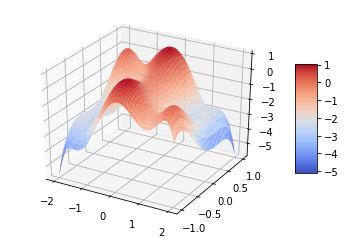

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

x = np.linspace(-2, 2, num=1000)
y = np.linspace(-1, 1, num=1000)
X, Y = np.meshgrid(x, y)
Z = camel(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [58]:
# Matern32 #
param = {'x': ('cont', [-3, 3]),
         'y': ('cont', [-2, 2])}
gpgomat32 = GPGO(gpmat32, acqEI, camel, param)
gpgomat32.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.82347142 -0.70585664]. 	  -0.04946066064139454 	 -0.04946066064139454
init   	 [-1.11522054 -1.07622212]. 	  -4.301213127192806 	 -0.04946066064139454
init   	 [-0.12476329  1.81992763]. 	  -30.467144318267547 	 -0.04946066064139454
1      	 [ 2.65929805 -1.45004815]. 	  -46.57251031657895 	 -0.04946066064139454
2      	 [ 1.48119889 -0.41488001]. 	  -1.0032439987920294 	 -0.04946066064139454
3      	 [ 1.71528356 -0.60308267]. 	  -0.11966518035656626 	 -0.04946066064139454
4      	 [-3. -2.]. 	  -162.89999999999998 	 -0.04946066064139454
5      	 [-0.47710581 -0.9111165 ]. 	  -0.6762899415630232 	 -0.04946066064139454
6      	 [ 1.76591541 -0.68217872]. 	  0.03930650551617798 	 0.03930650551617798
7      	 [ 1.81381116 -0.62433851]. 	  -0.21587533072392584 	 0.03930650551617798
8      	 [ 1.66376697 -0.71933294]. 	  0.14410220105290739 	 0.14410220105290739
9      	 [3. 2.]. 	  -162.89999999999998 	 0.1441022010529

# Squared Exponential #

In [60]:
gpgosqex = GPGO(gpsqex, acqEI, camel, param)
gpgosqex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.70654326 1.45301841]. 	  -11.926240457756428 	 -4.009937234156057
init   	 [-2.08306423 -0.66197282]. 	  -5.444395003494816 	 -4.009937234156057
init   	 [-1.7339999  -1.01717801]. 	  -4.009937234156057 	 -4.009937234156057
1      	 [-0.11878139 -2.        ]. 	  -48.29358175874106 	 -4.009937234156057
2      	 [-2.60960508 -2.        ]. 	  -88.34398956900625 	 -4.009937234156057
3      	 [-1.28332997 -0.40261963]. 	  -2.3541491196368143 	 -2.3541491196368143
4      	 [-1.52932185 -0.70530124]. 	  -2.211280894819811 	 -2.211280894819811
5      	 [-0.71156031  0.59848997]. 	  -0.18476506791022818 	 -0.18476506791022818
6      	 [-0.65572675  0.17071763]. 	  -1.1330344278636093 	 -0.18476506791022818
7      	 [-1.38210523  0.76194091]. 	  -0.27440655483417864 	 -0.18476506791022818
8      	 [-1.04554639  0.43002799]. 	  -1.2460657036768925 	 -0.18476506791022818
9      	 [-1.12870224  1.86896576]. 	  -35.10027902974652 

# Rational QUadratic #

In [67]:
gpgorquad = GPGO(gprquad, acqEI, camel, param)
gpgorquad.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.5379818  0.54288712]. 	  -0.4504817481463481 	 -0.4504817481463481
init   	 [-2.76761957 -1.73235402]. 	  -86.0465161270985 	 -0.4504817481463481
init   	 [1.38111951 1.02392439]. 	  -3.9197755145356172 	 -0.4504817481463481
1      	 [0.56715731 0.66341563]. 	  -0.4710804494653783 	 -0.4504817481463481
2      	 [0.63405642 0.54252879]. 	  -0.8035367880417947 	 -0.4504817481463481
3      	 [0.32751236 0.6957639 ]. 	  0.3658089548692083 	 0.3658089548692083
4      	 [0.14710094 0.85306823]. 	  0.5815025738318806 	 0.5815025738318806
5      	 [2.99266842 0.25165751]. 	  -107.35537075797934 	 0.5815025738318806
6      	 [0.05769885 0.65693638]. 	  0.9300689825876354 	 0.9300689825876354
7      	 [0.70120803 1.47125609]. 	  -12.613851289899575 	 0.9300689825876354
8      	 [-0.74169591  1.00236933]. 	  -0.8960469842295522 	 0.9300689825876354
9      	 [-0.12374679  0.83965446]. 	  0.8750105445466533 	 0.9300689825876354
1

# Matern52 #

In [61]:
gpgomat52 = GPGO(gpmat52, acqEI, camel, param)
gpgomat52.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.31500602 -1.98668092]. 	  -63.55411291431773 	 -37.346654374081545
init   	 [-2.64299124  0.430809  ]. 	  -37.346654374081545 	 -37.346654374081545
init   	 [-1.31023109 -1.93115031]. 	  -45.60921985846651 	 -37.346654374081545
1      	 [3. 2.]. 	  -162.89999999999998 	 -37.346654374081545
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -37.346654374081545
3      	 [-0.65201933  2.        ]. 	  -48.04254688808834 	 -37.346654374081545
4      	 [ 0.26645697 -0.42304312]. 	  0.42693948057554554 	 0.42693948057554554
5      	 [ 0.29597476 -0.37514999]. 	  0.26024377785982616 	 0.42693948057554554
6      	 [ 0.23620684 -0.48672717]. 	  0.6213934708044494 	 0.6213934708044494
7      	 [ 0.12868379 -0.39015552]. 	  0.5007429416099157 	 0.6213934708044494
8      	 [ 0.2355198  -1.04760839]. 	  -0.3966865665518863 	 0.6213934708044494
9      	 [ 0.15417744 -0.65338501]. 	  0.9854691732544469 	 0.9854691732544469
10     	 [-0.0

# Gamma Exponential #

In [62]:
gpgogamex = GPGO(gpgamex, acqEI, griewank, param)
gpgogamex.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.36749984 -1.17693989]. 	  -0.3720986242493326 	 -0.3316767864434328
init   	 [-0.20494667  1.15822113]. 	  -0.3316767864434328 	 -0.3316767864434328
init   	 [2.3638759 1.4492323]. 	  -1.3719339979473963 	 -0.3316767864434328
1      	 [-3. -2.]. 	  -1.157633087709871 	 -0.3316767864434328
2      	 [-3.  2.]. 	  -1.157633087709871 	 -0.3316767864434328
3      	 [ 3. -2.]. 	  -1.157633087709871 	 -0.3316767864434328
4      	 [-0.66283739 -2.        ]. 	  -0.8781873145476873 	 -0.3316767864434328
5      	 [-0.79950402  2.        ]. 	  -0.8924573130865077 	 -0.3316767864434328
6      	 [-0.72626384 -0.01510778]. 	  -0.2525138593793551 	 -0.2525138593793551
7      	 [-3.       -0.003267]. 	  -1.9922398576445841 	 -0.2525138593793551
8      	 [0.52582355 0.07191368]. 	  -0.13627753916709695 	 -0.13627753916709695
9      	 [ 1.37524659 -0.52256435]. 	  -0.8193499730704707 	 -0.13627753916709695
10     	 [-0.02273326  0.252

96     	 [0.10391357 0.48077098]. 	  -0.06237673427139012 	 -0.0009172688079837066
97     	 [ 0.07735693 -0.07772569]. 	  -0.004498987188738868 	 -0.0009172688079837066
98     	 [1.10184014 0.92620364]. 	  -0.6420749932003018 	 -0.0009172688079837066
99     	 [-0.07218725 -0.08140174]. 	  -0.004259118167794895 	 -0.0009172688079837066
100    	 [-0.00201194  0.17999058]. 	  -0.008098332802305541 	 -0.0009172688079837066


# Ensemble #

In [63]:
ens = Ensemble([gprquad,gpsqex,gpmat32,gpgamex,gpmat52])
gpgo = GPGO(ens, acqEI, camel, param)
gpgo.run(max_iter=100)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 0.44137563 -1.81303339]. 	  -29.97327120729331 	 -10.361514140953181
init   	 [1.25248173 1.49607501]. 	  -15.353565600771187 	 -10.361514140953181
init   	 [2.25772963 0.52924585]. 	  -10.361514140953181 	 -10.361514140953181
1      	 [-3.  2.]. 	  -150.89999999999998 	 -10.361514140953181
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -10.361514140953181
3      	 [3. 2.]. 	  -162.89999999999998 	 -10.361514140953181
4      	 [1.50131301 0.37819882]. 	  -2.2415930244570745 	 -2.2415930244570745
5      	 [1.59481493 0.38618805]. 	  -2.1815626388259153 	 -2.1815626388259153
6      	 [1.55623244 0.39607963]. 	  -2.192471670154112 	 -2.1815626388259153
7      	 [1.57157073 0.37723825]. 	  -2.1958583875110884 	 -2.1815626388259153
8      	 [1.53511094 0.39174249]. 	  -2.2081596905041807 	 -2.1815626388259153
9      	 [1.55301673 0.37963504]. 	  -2.2044212511649275 	 -2.1815626388259153
10     	 [0.95792986 0.61777424]. 	  -